In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def mnk(t, a): # t == x, a == y
    xy = 0
    xx = 0
    yy = 0
    x = 0
    y = 0
    for j in range(len(t)):
        xy += t[j] * a[j]
        x += t[j]
        y += a[j]
        xx += t[j] * t[j]
        yy += a[j] * a[j]
    xy /= len(t)
    xx /= len(t)
    yy /= len(t)
    x /= len(t)
    y /= len(t)
    k = float((xy - x * y) / (xx - x ** 2))
    b = float(y - k * x)
    rk = float((1 / (len(t) ** 0.5)) * ((yy - y ** 2) / (xx - x ** 2) - k ** 2) ** 0.5)
    rb = float(rk * (xx - x ** 2) ** 0.5)
    k_b_rk_rb = [k, b, rk, rb]
    return k_b_rk_rb

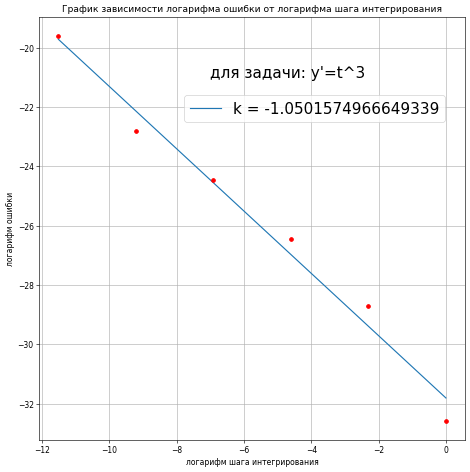

In [37]:
with open("data_cube.txt", "r") as f:
    data = f.read()
datacube1, datacube2, datacube3, datacube4, datacube5, datacube6 = data.split("\n\n")

datacube6 = np.array([[float(a.split()[0]), float(a.split()[1])] for a in datacube6.split("\n")])
error6 = max(abs(np.power(datacube6[:, 0], 4)/4 - datacube6[:, 1]))

datacube5 = np.array([[float(a.split()[0]), float(a.split()[1])] for a in datacube5.split("\n")])
error5 = max(abs(np.power(datacube5[:, 0], 4)/4 - datacube5[:, 1]))

datacube4 = np.array([[float(a.split()[0]), float(a.split()[1])] for a in datacube4.split("\n")])
error4 = max(abs(np.power(datacube4[:, 0], 4)/4 - datacube4[:, 1]))

datacube3 = np.array([[float(a.split()[0]), float(a.split()[1])] for a in datacube3.split("\n")])
error3 = max(abs(np.power(datacube3[:, 0], 4)/4 - datacube3[:, 1]))

datacube2 = np.array([[float(a.split()[0]), float(a.split()[1])] for a in datacube2.split("\n")])
error2 = max(abs(np.power(datacube2[:, 0], 4)/4 - datacube2[:, 1]))

datacube1 = np.array([[float(a.split()[0]), float(a.split()[1])] for a in datacube1.split("\n")])
error1 = max(abs(np.power(datacube1[:, 0], 4)/4 - datacube1[:, 1]))

errors = np.array([error1, error2, error3, error4, error5, error6])
x = np.array([-5, -4, -3, -2, -1, 0])
x = x * np.log(10)

fig, ax = plt.subplots(figsize=(10, 10), dpi=55)
ax.grid()

for i in range(len(x)):
    plt.errorbar(x[i], np.log(errors[i]), color='r',   fmt='.', markersize = 10)
params = mnk(x, np.log(errors))
plt.plot(x, np.polyval([params[0], params[1]], x), label = "k = {}".format(params[0]))
plt.legend(prop={'size': 20}, loc = (0.34, 0.75))
ax.text(-7.0, -21, r"для задачи: y'=t^3", color = 'black', fontsize=20)
plt.title("График зависимости логарифма ошибки от логарифма шага интегрирования")
plt.xlabel("логарифм шага интегрирования")
plt.ylabel("логарифм ошибки")
plt.savefig("graph1.png")

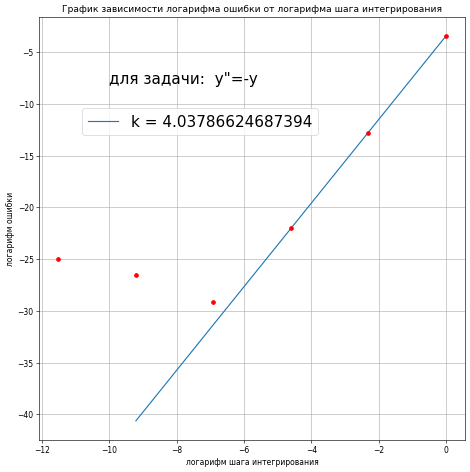

In [34]:
with open("data_oscillator.txt", "r") as f:
    data = f.read()
datas = data.split("\n\n")

errors_1 = []
errors_2 = []
for data in datas:
    amogus = np.array([[float(a.split()[0]), float(a.split()[1]), float(a.split()[2])] for a in data.split("\n")])
    errors_1.append(max(abs(np.sin(amogus[:, 0]) - amogus[:, 1])))

fig, ax = plt.subplots(figsize=(10, 10), dpi=55)
ax.grid()

for i in range(len(x)):
    plt.errorbar(x[i], np.log(errors_1[i]), color='r',   fmt='.', markersize = 10)
params = mnk(x[3:], np.log(errors_1[3:]))
plt.plot(x[1:], np.polyval([params[0], params[1]], x[1:]), label = "k = {}".format(params[0]))
plt.legend(prop={'size': 20}, loc = (0.1, 0.72))
ax.text(-10.0, -8, r'для задачи:  y"=-y', color = 'black', fontsize=20)
plt.title("График зависимости логарифма ошибки от логарифма шага интегрирования")
plt.xlabel("логарифм шага интегрирования")
plt.ylabel("логарифм ошибки")
plt.savefig("graph2.png")